# Food Security In Madagascar

# Overview
<div style="text-align: justify">

### Introduction <br>
Madagascar, the fourth largest island in the world, is facing a major food insecurity crisis,  with around 33% of its population approximately 8.8 million people affected. This issue is especially severe in the southern regions, where over 1.6 million people experience extreme levels of food insecurity, leading to widespread malnutrition, particularly among children. The crisis is driven by various factors, including dependence on agriculture, which supports 70-80% of the population, and vulnerability to climate change impacts like droughts and irregular rainfall. These challenges threaten both the economic stability and long-term development of the country, making Madagascar a key focus for addressing food insecurity and finding sustainable solutions.<br>
### Aim
The aim of this project is to identify the main factors that affect food security in Madagascar. By using predicted population growth, the project aims to determine the needed crop yield in the future such that Madagascar will be able to prepare better for the future and be able to improve food security.

### Problem Statement
How might we utilize our model to accurately predict crop yield such that we can better prepare for food insecurity?
</div>

# Preparation of Dataset for Madagascar
<div style="text-align: justify">

**Dependent Variable**<br>
Crop Yield for Rice and Maize will be the dependent variable that will be used in the model. This is with the assumption that rice and maize will be representative of food security as rice and maize are a staple food in Madagascar.

**Independent Variable**<br>
The independent variables used in building the model are variables with relatively high $r^2$ value with respect to crop yield. 
The variables used for building the multiple linear regression model is listed below: <br>
- **Crop Yield (Rice & Maize)** dataset by Food and Agriculture Organization of the United Nations: [Link](https://www.fao.org/faostat/en/#data/QCL)
- **Mean Surface Temperature** dataset by Climate Change Knowledge Portal: [Link](https://climateknowledgeportal.worldbank.org/country/madagascar/trends-variability-historical)
- **Foreign Direct Investment** dataset by World Bank Group: [Link](https://www.fao.org/faostat/en/#data/FDI)
- **Gross Domestic Product** dataset by World Bank: [Link](https://data.worldbank.org/indicator/ny.gdp.mktp.cd?name_desc=false&locations=MG)
- **Agriculture, Forestry, and Fishing, value added (% of GDP)** dataset by World Bank
: [Link](https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?locations=MG)

</div>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from typing import TypeAlias, Optional, Any
from IPython.display import display

### Cleaning and Analysis of Independent Variables


In [2]:
# Read raw data for temperature
iv_temperature = pd.read_csv("Data/temperature.csv")
# select rows from the year 1995 to 2020
iv_temperature = pd.DataFrame(iv_temperature.iloc[45:,1])
# Rename Column
iv_temperature.rename(columns ={iv_temperature.columns[0]:"Average Surface Temperature"}, inplace=True)
iv_temperature.reset_index(drop = True, inplace=True)

Text(0, 0.5, 'Temperature (Degree Celcius)')

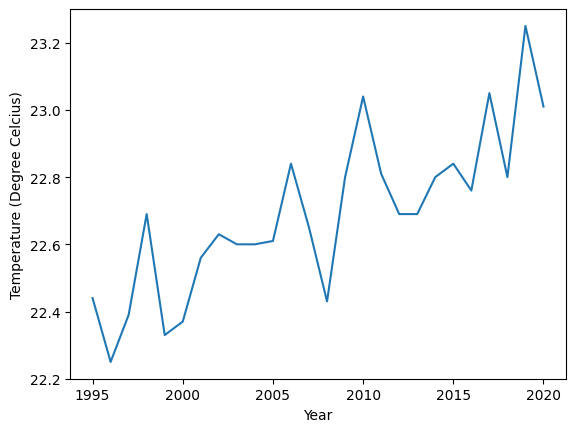

In [ ]:
# Plot Temperature from 1995 to 2020
plt.plot(np.arange(1995, 1995 + len(iv_temperature)), iv_temperature)
plt.xlabel("Year")
plt.ylabel("Temperature (Degree Celcius)")
plt.show()


In [4]:
# Read raw data for Madagascar GDP
iv_gdp = pd.read_excel("Data/gdp.xlsx")
# Transpose from row to column
iv_gdp = iv_gdp[iv_gdp.iloc[:,0].str.contains("Madagascar", na = False)].T
# Select data for the year 1995 to 2020
iv_gdp = iv_gdp[39:65]

# Read raw data for % value of GDP for Agriculture, Forestry and Fishing 
iv_agri = pd.read_excel("Data/agri_forestry_fishing_value_added.xlsx")
# Transpose from row to column
iv_agri = iv_agri[iv_agri.iloc[:,0].str.contains("Madagascar", na = False)].T
# Select Data from the year 1995 to 2020
iv_agri = iv_agri[40:66]

# Add GDP and % value of GDP for Agriculture, Forestry and Fishing to a new dataframe
iv_gdp_agri = np.concatenate((iv_gdp,iv_agri), axis = 1)
iv_gdp_agri = pd.DataFrame(iv_gdp_agri)
# Rename columns 
iv_gdp_agri.rename(columns={iv_gdp_agri.columns[0]:"GDP in US$ (Million)",
                            iv_gdp_agri.columns[1]:"Value (% of GDP)"},inplace=True)
# Reduce scale of value
iv_gdp_agri["GDP in US$ (Million)"] = iv_gdp_agri["GDP in US$ (Million)"]/1000000
# Calculate value for Agriculture, Forestry and Fishing industry that accounts for GDP
iv_gdp_agri["GDP of Agriculture"] = iv_gdp_agri["GDP in US$ (Million)"] * (iv_gdp_agri["Value (% of GDP)"]/100)

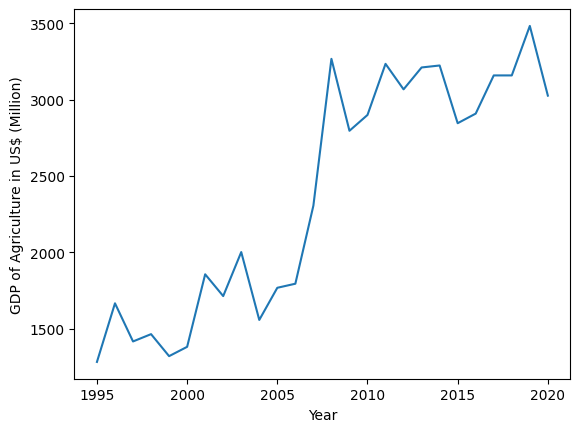

In [5]:
plt.plot(np.arange(1995, 1995 + len(iv_gdp_agri["GDP of Agriculture"] )), iv_gdp_agri["GDP of Agriculture"] )
plt.xlabel("Year")
plt.ylabel("GDP of Agriculture in US$ (Million)")
plt.show()

In [6]:
# Read raw data for Foreign Direct Investment inflows for Agriculture, Forestry, Fishing
iv_fdi = pd.read_csv("Data/fdi.csv")
# Select value of FDI
iv_fdi = iv_fdi.loc[:30,["Value"]]
# Rename columns
iv_fdi.rename(columns = {"Value":"Value in 000,000"}, inplace = True)
# Select year 1995 to 2020
iv_fdi = iv_fdi[5:]

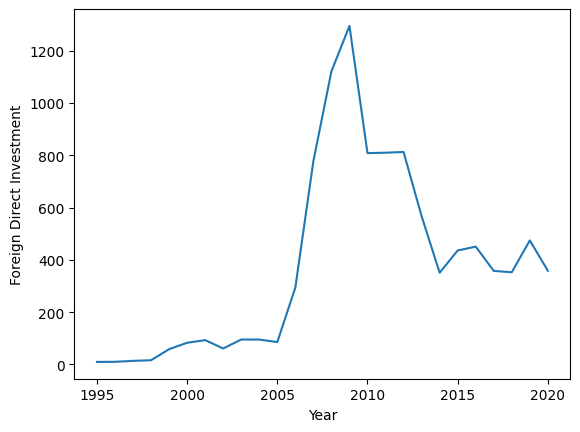

In [38]:
plt.plot(np.arange(1995, 1995 + len(iv_fdi)), iv_fdi)
plt.xlabel("Year")
plt.ylabel("Foreign Direct Investment")
plt.show()

- Combine all of the Data into one dataframe
- Convert cell types to its respective types such as integer and float

In [8]:
# Select GDP for Agriculture, Fishing, Forestry
iv_gdp_agri = iv_gdp_agri.loc[:,["GDP of Agriculture"]]
# Combine all clean features into one dataframe
df_features = np.concatenate((iv_gdp_agri,iv_fdi,iv_temperature),axis = 1)
# Convert dataframe to pandas DataFrame
df_features = pd.DataFrame(df_features)
# Rename Columns
df_features.rename(columns={df_features.columns[0]:"Agriculture GDP 000,000",
                            df_features.columns[1]:"FDI Value 000,000",
                            df_features.columns[2]:"Annual Mean Temperature (Celcius)"},inplace=True)


# Convert values in cells from object to float
df_features['Agriculture GDP 000,000'] = pd.to_numeric(df_features['Agriculture GDP 000,000'])
df_features['FDI Value 000,000'] = pd.to_numeric(df_features['FDI Value 000,000'])
df_features['Annual Mean Temperature (Celcius)'] = pd.to_numeric(df_features['Annual Mean Temperature (Celcius)'])
# Round off values to 2 decimal places
df_features.iloc[:,:] = df_features.iloc[:,:].round(2)


In [9]:
# Descriptive statistics
display(df_features.describe())

,"Agriculture GDP 000,000","FDI Value 000,000",Annual Mean Temperature (Celcius)
count,26.000000,26.000000,26.000000
mean,2377.623462,380.262308,22.689615
std,775.411976,364.700514,0.241586
min,1283.110000,9.710000,22.250000
25%,1678.687500,83.627500,22.570000
50%,2551.270000,351.750000,22.690000
75%,3135.997500,543.887500,22.807500
max,3482.860000,1294.600000,23.250000


### Cleaning and Analysis of Dependent Variables

In [10]:
# Read raw data for target
dp_crop_yield = pd.read_excel("Data/crop_yield_rice_maize.xlsx")
# Select data for rice and maize crop yield
dp_maize = dp_crop_yield.loc[34:59,["Value"]]
dp_rice = dp_crop_yield.loc[96:121,["Value"]]
# Add both columns of data to new dataframe
dp_target = np.concatenate([dp_rice,dp_maize],axis = 1)
dp_target = pd.DataFrame(dp_target)
# Convert cell type to float
dp_target[0]= pd.to_numeric(dp_target[0])
dp_target[1]= pd.to_numeric(dp_target[1])
# Calculate total yield
dp_target["Total Yield kg/Ha"] = round(dp_target[0] + dp_target[1],2)
# Select total yield as the target
df_target = dp_target.loc[:,["Total Yield kg/Ha"]]

Text(0, 0.5, 'Crop Yield (kg/Ha)')

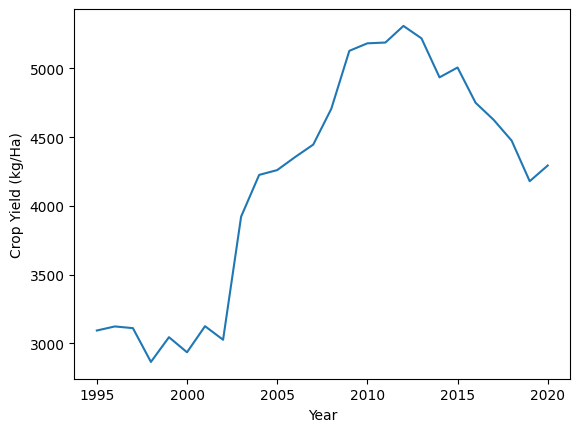

In [ ]:
plt.plot(np.arange(1995, 1995 + len(df_target)), df_target)
plt.xlabel("Year")
plt.ylabel("Crop Yield (kg/Ha)")
plt.show()

# Features and Target Preparation

Prepare features and target for model training.

In [12]:
# Create dataframe which consist of all features and target
df = np.concatenate((df_features,df_target),axis = 1)
df = pd.DataFrame(df)
# Rename columns
df.rename(columns = {df.columns[0]: "Agriculture GDP 000,000",
                     df.columns[1]: "FDI Value 000,000",
                     df.columns[2]: "Annual Mean Temperature (Celcius)",
                     df.columns[3]: "Crop Yield kg/Ha"},inplace=True)

In [13]:
display(df.describe())

,"Agriculture GDP 000,000","FDI Value 000,000",Annual Mean Temperature (Celcius),Crop Yield kg/Ha
count,26.000000,26.000000,26.000000,26.000000
mean,2377.623462,380.262308,22.689615,4174.246154
std,775.411976,364.700514,0.241586,850.026940
min,1283.110000,9.710000,22.250000,2864.700000
25%,1678.687500,83.627500,22.570000,3123.325000
50%,2551.270000,351.750000,22.690000,4324.800000
75%,3135.997500,543.887500,22.807500,4888.850000
max,3482.860000,1294.600000,23.250000,5309.300000


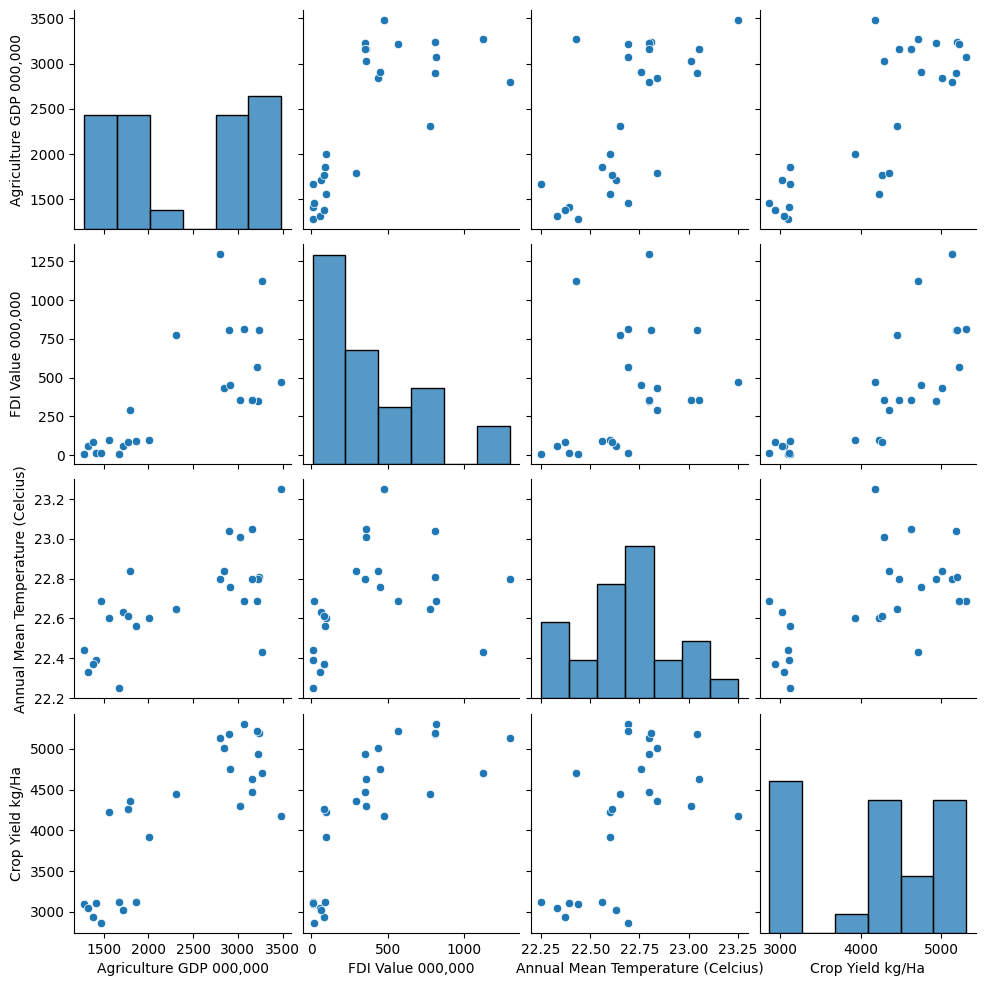

In [14]:
# Plot pair plot to visualize the relationship between each features and target
myplot: sns.axisgrid.PairGrid = sns.pairplot(data=df)

### Normalize Function
<div style="text-align: justify">
Normalize data to ensure that datasets with larger scales do not dominate the learning process of the models.

Z-score Normalization can be used when it is assumed that the distribution of the dataset follows a normal distribution. It transforms features to have a mean of 0 and a standard deviation of 1. However, the datasets that are used might not always have a normal distribution.

The **Z-score normalization** formula is given by:

$$
X_{\text{z}} = \frac{X - \mu}{\sigma}
$$

**Min-Max Normalization** can be used to normalize datasets when the data distribution is non-normal. This can be done by finding the maximum and minimum values from the dataset.

The min-max normalization formula is given by:

$$
X_{\text{min-max}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

where $X$ is the original value, $X_{\text{min}}$ is the minimum value, and $X_{\text{max}}$ is the maximum value in the dataset.

Therefore, Z-Score normalization will be used when the dataset has a normal distribution curve and Min-Max Normalization when the dataset does not have a normal distribution.
</div>

In [15]:
def normalize_minmax(array: np.ndarray, columns_mins: Optional[np.ndarray]=None, 
                     columns_maxs: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    ''' 
    Function to normalize feature dataframe using Min-Max
    '''
    data = np.copy(array)
    if columns_mins is None:
        columns_mins = data.min(axis = 0)
    if columns_maxs is None:
        columns_maxs = data.max(axis = 0)
    out = (data - columns_mins)/(columns_maxs - columns_mins)
    
    return out, columns_mins, columns_maxs

### Retrieve Features and Target Data

In [16]:
def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    '''
    Function to retrieve feature and target dataframe from main dataframe
    '''
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

### Prepare Feature
- Add 1 column of 1's to the front of the array to keep $\beta_{0}$ constant when calculating $Xb$.

$$
X = \left[\begin{array}{ccc}
x_1^1 & x_2^1 & \cdots & x_n^1 \\
x_1^2 & x_2^2 & \cdots & x_n^2 \\
\vdots & \vdots & \vdots & \vdots \\
x_1^m & x_2^m & \cdots & x_n^m
\end{array}\right] 
\in \mathbb{R}^{m \times n}
\quad
\rightarrow
\quad
X = \left[\begin{array}{ccc}
1 & x_1^1 & x_2^1 & \cdots & x_n^1 \\
1 & x_1^2 & x_2^2 & \cdots & x_n^2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_1^m & x_2^m & \cdots & x_n^m
\end{array}\right] 
\in \mathbb{R}^{m \times (n+1)}
$$


In [17]:
def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    ''' 
    Function to add column of 1 and prepare feature for calculation of estimated target value
    '''
    ones = np.ones([np_feature.shape[0],1])
    new_df = np.concatenate((ones,np_feature), axis = 1)
    return new_df

### Linear Regression

Given that $X$ consists of each data point and $\hat{b}$ consists of the weights of each parameter, $\hat{y}$ contains the estimated target values based on the beta values.

$$
X = \left[\begin{array}{cccc} 
1 & x_1^1 & \cdots & x_n^1 \\ 
1 & x_1^2 & \cdots & x_n^2 \\ 
\vdots & \vdots & \vdots & \vdots \\ 
1 & x_1^m & \cdots & x_n^m 
\end{array}\right] 
\in \mathbb{R}^{m \times (n+1)}
\quad \text{and} \quad
\hat{b} = \left[\begin{array}{c}
\hat{\beta_0} \\ 
\hat{\beta_1} \\ 
\vdots \\ 
\hat{\beta_n}
\end{array}\right] 
\in \mathbb{R}^{(n+1) \times 1}
$$

<br>

$$
\hat{y} = X \times \hat{b} = \left[\begin{array}{c}
\hat{\beta_0} + x_1^1 \hat{\beta_1} + \cdots + x_n^1 \hat{\beta_n} \\
\hat{\beta_0} + x_1^2 \hat{\beta_1} + \cdots + x_n^2 \hat{\beta_n} \\
\vdots \\
\hat{\beta_0} + x_1^m \hat{\beta_1} + \cdots + x_n^m \hat{\beta_n}
\end{array}\right]
\in \mathbb{R}^{m \times 1}
$$




In [18]:
def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    ''' 
    Function to calculate estimated target value
    '''
    y_est = np.matmul(X,beta)
    return y_est

In [19]:

def predict_linreg_minmax(df_feature: pd.DataFrame, 
                   beta: np.ndarray, 
                   columns_mins: Optional[np.ndarray]=None, 
                   columns_maxs: Optional[np.ndarray]=None) -> np.ndarray:
    ''' 
    Function to prepare feature and calculate estimated target value using min-max normalized features
    '''
    data,_,_ = normalize_minmax(df_feature,columns_mins,columns_maxs)
    clean_data = prepare_feature(data)
    y_est = calc_linreg(clean_data,beta)
    return y_est

In [20]:
def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    ''' 
    Function to calculate Cost
    '''
    y_est = calc_linreg(X,beta).reshape(-1,1)
    m = X.shape[0]
    J = (1/(2*m)) * np.matmul((y_est-y).T ,(y_est-y))
    return np.squeeze(J)

In [21]:
def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray, 
                            alpha: float, num_iters: int, squared: bool = False) -> tuple[np.ndarray, np.ndarray]:
    ''' 
    Function to optimize beta by calculating the lowest cost function using gradient descent to move towards the minima (global/local).
    For input squared : boolean, this is used for temperature squared to limit its coefficient to remain negative due to its relationship with crop yield.
    '''
    m = X.shape[0]
    J_storage = np.zeros(shape=(num_iters))
    beta_storage = []
    for i in range(num_iters): 
        beta = beta - (alpha/m) * np.matmul(X.T, calc_linreg(X, beta) - y)
        if squared is True:
            if beta[-1] > 0:
                beta[-1] *= -1
        beta_storage.append(beta)
        cost = compute_cost_linreg(X,y,beta)
        J_storage[i] = cost
    return beta, J_storage, beta_storage

In [22]:
def split_data(df_feature: pd.DataFrame, 
               df_target: pd.DataFrame, 
               random_state: int = 10, 
               test_size: float=0.3) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    ''' 
    Function to split data for training and testing based on test size.
    '''
    np.random.seed(random_state)
    test_size_int = int(test_size * df_feature.shape[0])
    test_i = np.random.choice(df_feature.index,size =test_size_int , replace=False)
    
    df_target_test = df_target.loc[test_i]
    df_feature_test = df_feature.loc[test_i]
    
    df_target_train = df_target.drop(test_i)
    df_feature_train = df_feature.drop(test_i)
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test


# Building Model

In this function, it takes in the dataframe for feature and target used for training the model. <br>
1) Convert each Pandas DataFrame into numpy DataFrame.
2) Using MinMax Normalization to transform the feature DataFrame
3) Prepare feature DataFrame by adding column of one's to the front of the DataFrame
4) Run Gradient Descent Algorithm to calculate the optimized beta values
5) Return model "Dictionary" which stores the information for the beta, min, max values

In [23]:
def build_model_linreg(df_feature_train: pd.DataFrame,
                       df_target_train: pd.DataFrame,
                       beta: Optional[np.ndarray] = None,
                       alpha: float = 0.01,
                       iterations: int = 1500) -> tuple[dict[str, Any], np.ndarray]:
    ''' 
    Function to run multiple linear regression and calculating beta values using Gradient Descent Algorithm
    '''
    if beta is None:
        beta = np.zeros((df_feature_train.shape[1] + 1, 1)) 
    assert beta.shape == (df_feature_train.shape[1] + 1, 1)
    
    # Dictionary for storing model information for beta, min, max
    model: dict[str, Any] = {}
    # Convert dataframes to numpy
    df_feature_train, df_target_train = df_feature_train.to_numpy() , df_target_train.to_numpy()
    # Normalize features using MinMax Normalization
    array_features_train_z,min,max = normalize_minmax(df_feature_train)
    # Prepare feature DataFrame for Gradient Descent
    X: np.ndarray = prepare_feature(array_features_train_z)
    # Run Gradient Descent Algorithm
    beta, J_storage, _ = gradient_descent_linreg(X,df_target_train,beta,alpha,iterations)
    
    # Store model information in dictionary
    model["beta"] = beta
    model["min"] = min
    model["max"] = max
    
    
    return model, J_storage

In [24]:
# Split Data for test and train using base parameters random_state = 10 and test_size = 0.3
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target)
# Run multiple linear regression model and extract model information
model, J_storage = build_model_linreg(df_features_train, df_target_train)
# Predict target values using feature test dataset and model information
pred: np.ndarray = predict_linreg_minmax(df_features_test.to_numpy(),model["beta"], model["min"], model["max"])


In [25]:
def transform_features(df_feature: pd.DataFrame, 
                       colname: str, 
                       colname_transformed: str) -> pd.DataFrame:
    ''' 
    Function to include polynomial relationship by adding a new column which is the squared value
    '''
    df_feature.loc[:, colname_transformed] = df_feature[colname] ** 2
    return df_feature

### Run Gradient Descent Algoithm

In [26]:
# To account for the polynomial relationship between temperature and crop yield given that as temperature continues increasing over a threshold deemed unsuitable 
# for crop to grow, crop yield will decrease after increasing past this threshold. Add temperature^2 to account for polynomial relationship
df_features_p = transform_features(df_features, 
                                     "Annual Mean Temperature (Celcius)", 
                                     "Annual Mean Temperature Squared (Celcius)")

# Split Data for test and train using base parameters random_state = 10 and test_size = 0.3
df_features_p_train, df_features_p_test, df_target_p_train, df_target_p_test = split_data(df_features_p,df_target)
# Run multiple linear regression model and extract model information 
model_p, J_storage_p = build_model_linreg(df_features_p_train, df_target_p_train)
# Predict target values using feature test dataset and model information
pred_p: np.ndarray = predict_linreg_minmax(df_features_p_test.to_numpy(),model_p["beta"], model_p["min"], model_p["max"])


Text(0, 0.5, 'Cost')

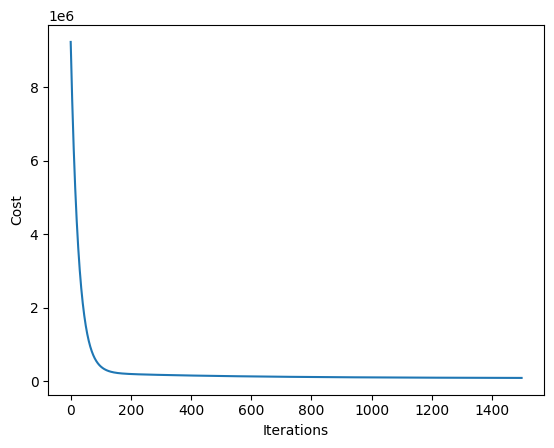

In [ ]:
# Plot graph to show algorithm moving towards point with lowest cost
plt.plot(J_storage_p)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

### Evaluation Functions <br>
<div style="text-align: justify">

Mean Absolute Percentage Error (MAPE): Mean absolute percentage error is intuitive at first glance as compared to mean squared error. This is because MAPE describes the mean percentage deviation of the predicted value from the actual value while mean squared error gives the average squared error between the predicted and actual value. When the scale used for our independent variables are large, the value calculated using Mean Squared Error is not intuitive at first glance and does not provide much value on its own unless compared against another model. Therefore, we introduce Mean Absolute Percentage Error.
$$
M = \frac{1}{n} \sum_{t=1}^{n}  \frac{\mid y_i-\hat{y_i} \mid}{y_i} \times 100
$$

Adjusted $r^2$: The value for adjusted $r^2$ indicates the relationship between the independent variables and the dependent variable. It is used as a corrected goodness-of-fit measure for linear models. A high $r^2$ tells us that the percentage of variance in the dependent variable can be explained by the independent variables of the model.
$$
\text{Adjusted } R^2 = 1 - \frac{(N-1)} {(N-p-1)} (1-R^2)
$$

In [28]:
def mape(y:np.ndarray , y_pred: np.ndarray):
    ''' 
    Mean Absolute Percentage Error: Calculate mean % deviation of predicted target data from actual target data
    '''
    pred = pd.DataFrame(y_pred)
    diff = np.abs(y - pred)/y
    return round(float(np.mean(diff) * 100),2)


In [29]:
def adjusted_r_squared(y, y_pred):
    ''' 
    Function to calculate adjusted R squared for multiple linear regression model
    '''
    # Number of data points
    n = y.shape[0]
    # Number of predictors (calculated from the number of columns in y_pred)
    p = y_pred.shape[1] if len(y_pred.shape) > 1 else 1
    # Calculate R-squared
    rss = np.sum((y - y_pred) ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (rss / tss)
    
    return 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)


### Evaluating using Mean Absolute Percentage Error and Adjusted $R^2$
<div style="text-align: justify">

By using the function above to calculate the percentage deviation of the predicted values from the actual values, the predicted values deviated by around **7.25%**.
When accounting for the polynomial relationship between $temperature^2$ and crop yield, the predicted values deviated by around **7.11%**. This is around **0.14%** lesser than just accounting for the linear relationship of temperature against crop yield. It is intuitive that temperature and crop yield do not have a linear relationship because as temperature increases past a threshold for the optimal temperature for crop to grow, crop growth and yield will decrease as the environment is no longer optimum.

In [ ]:
def describe_gd(model, model_p, df_target_test, df_target_p_test, pred, pred_p):
    ''' 
    Function to describe the performance of the gradient descent model 
    (including linear and polynomial relationship of temperature against crop yield)
    '''
    print("-" * 50)
    # Using chr(178) for superscript 2
    print(f'{"Model without Temperature" + chr(178):^55}')  
    print("-" * 50)
    coeff = model['beta']
    # Using chr(8320) for subscript 0
    print(f'{"β" + chr(8320) + ": Y Intercept":<40} {float(coeff[0,0]):,.2f}')  
    # Using chr(8321) for subscript 1
    print(f'{"β" + chr(8321) + ": Agriculture GDP 000,000":<40} {float(coeff[1,0]):,.2f}')  
    # Using chr(8322) for subscript 2
    print(f'{"β" + chr(8322) + ": FDI Value 000,000":<40} {float(coeff[2,0]):,.2f}')  
    # Using chr(8323) for subscript 3
    print(f'{"β" + chr(8323) + ": Annual Mean Temperature":<40} {float(coeff[3,0]):,.2f}')  
    print(f'{"Mean Absolute Percentage Error:":<40} {mape(df_target_test.to_numpy(),pred)}%')
    print(f'{"Adjusted R Squared:":<40} {float(adjusted_r_squared(df_target_test.to_numpy(),pred)):,.3f}')
    print("-" * 50)
    # Using chr(178) for superscript 2
    print(f'{"Model with Temperature" + chr(178) + " ":^55}')  
    print("-" * 50)
    coeff_p = model_p['beta']
    print(f'{"β" + chr(8320) + ": Y Intercept":<40} {float(coeff_p[0,0]):,.2f}')
    print(f'{"β" + chr(8321) + ": Agriculture GDP 000,000":<40} {float(coeff_p[1,0]):,.2f}')
    print(f'{"β" + chr(8322) + ": FDI Value 000,000":<40} {float(coeff_p[2,0]):,.2f}')
    print(f'{"β" + chr(8323) + ": Annual Mean Temperature":<40} {float(coeff_p[3,0]):,.2f}')
    print(f'{"β" + chr(8324) + ": Annual Mean Temperature Square":<40} {float(coeff_p[4,0]):,.2f}')
    print(f'{"Mean Absolute Percentage Error:":<40} {mape(df_target_p_test.to_numpy(),pred_p)}%')
    print(f'{"Adjusted R Squared:":<40} {float(adjusted_r_squared(df_target_p_test.to_numpy(),pred_p)):,.3f}')


In [31]:
describe_gd(model, model_p, df_target_test, df_target_p_test, pred, pred_p)

--------------------------------------------------
              Model without Temperature²               
--------------------------------------------------
β₀: Y Intercept                          3,084.15
β₁: Agriculture GDP 000,000              1,073.61
β₂: FDI Value 000,000                    960.76
β₃: Annual Mean Temperature              604.98
Mean Absolute Percentage Error:          7.25%
Adjusted R Squared:                      0.861
--------------------------------------------------
               Model with Temperature²                 
--------------------------------------------------
β₀: Y Intercept                          3,074.89
β₁: Agriculture GDP 000,000              979.08
β₂: FDI Value 000,000                    1,007.34
β₃: Annual Mean Temperature              358.05
β₄: Annual Mean Temperature Square       341.43
Mean Absolute Percentage Error:          7.11%
Adjusted R Squared:                      0.862


# **Particle Swarm Optimization For Hyperparameter Tuning**
<div style="text-align: justify">

**Gradient Descent Algorithm** aims to find the coefficients of multiple linear regression by minimizing the cost function. To do so, the algorithm starts with defined constants and moves in the direction of the steepest slope. The steepest slope is perpendicular to the contour lines. Another constant that is defined is alpha, which is the learning rate of the algorithm. Alpha determines the magnitude of changes to make to the weights when it moves in the direction of the steepest slope, and it can be interpreted as the magnitude of each step. One flaw of this algorithm is that if the initial constants defined are closer to a local minimum than the global minimum, the algorithm will move towards the local minimum, and the coefficients of the multiple linear regression model will not be fully optimized. Therefore, to fully optimize our multiple linear regression model, Particle Swarm Optimization can be utilized to determine the global minimum cost.
<br>

**Particle Swarm Optimization** <br>
[Reference](https://kamenpenkov.wordpress.com/wp-content/uploads/2016/01/pso-m-clerc-2006.pdf) <br>
**Introduction:**  
Particle Swarm Optimization (PSO) algorithm was first utilized to simulate social behavior as a representation of the movements of bird flocks and fish schools. PSO is a metaheuristic algorithm that introduces the idea of swarm intelligence and utilizes it to search large spaces to identify candidate solutions. The algorithm works by first initializing candidate solutions, also known as particles, on the search space randomly. These particles have attributes that keep track of their velocity and position in the search space. The position of each particle is determined by its personal best-known solution (pbest) as well as the global best-known solution (gbest). After every iteration, the position of each particle is updated and determined using its velocity, personal best-known solution, and the global best-known solution. Given that we are trying to minimize the cost function, the particle swarm will attempt to look for the global minimum, as compared to the Gradient Descent Algorithm.  
<br>

**Difference Between Gradient Descent Algorithm and Particle Swarm Optimization:**  
Gradient Descent Algorithm starts by initializing a random position in the search space and attempts to look for the closest minimum in the search space. In a non-convex search space, if the initial position of the Gradient Descent Algorithm is closer to a local minimum than a global minimum, the algorithm will move towards the local minimum and determine it as the most optimal solution in the search space. However, we can do better. We can utilize Particle Swarm Optimization to look for the global minimum. This is done by initializing many particles in the non-convex search space and constantly updating each particle's best-known solution and the global best-known solution. This allows particles to move towards the global minimum by using the idea of swarm intelligence, such as sharing information between particles to find the global best-known solution. In this way, particles can escape from local minimum positions, unlike the Gradient Descent Algorithm. In the event that the problem is a convex search space, the gradient descent algorithm will be preferred as it is computationally less intensive.

</div>

**Equation of Motion**  
[Reference](https://en.wikipedia.org/wiki/Particle_swarm_optimization#Parameter_selection) <br>
The equation for each particle's displacement can be defined as shown below:

$$
\begin{cases} 
v_{i,d} \leftarrow wv_{i,d} + \phi_p r_p(p_{i,d}-x_{i,d}) + \phi_g r_g(g_d-x_{i,d}) \\ 
x_i \leftarrow x_i + v_i
\end{cases}
$$

whereby

$$
\begin{align*}
x_i &\leftarrow \text{current particle position in search space at moment} t \\ 
v_i &\leftarrow \text{i-th particle velocity} \\ 
p_i &\leftarrow \text{best-known position found by specific particle (interpreted as personal best-known position)} \\ 
g_i &\leftarrow \text{best-known position found by informants (global best-known position)} \\ 
w &\leftarrow \text{Inertia weight} \\ 
\phi_p , \phi_g &\leftarrow \text{Cognitive coefficient and Social coefficient} \\ 
r_p , r_g &\leftarrow \text{Randomly chosen value from a uniform distribution from 0 to 1}
\end{align*}
$$


### Build PSO Model

In [32]:
# Particle class for PSO
class Particle:
    ''' 
    Attributes of each particle in search space:
    Position: Store position of particle in n dimensions whereby n is the number of features. Position coordinates is the beta coefficients
    Velocity: Velocity of particle moving in n dimension search space
    Best Position: Stores personal best-known position of particle which gives the lowest cost for given beta coefficients
    Lowest Cost: Stores lowest cost of particle
    '''
    def __init__(self, position):

        
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.lowest_cost = float('inf')

# Fitness function for PSO: Calculates cost for given position(beta)
def fitness_function(beta, X, y):
    ''' 
    Calculate cost of particle's position
    '''
    return compute_cost_linreg(X, y, beta)

# Particle Swarm Optimization (PSO) function
def pso(f_x: Any, num_particles: int, dimension: int, num_iterations: int, train_features: np.ndarray, train_target: np.ndarray, seed_val: int = 100):
    ''' 
    Particle Swarm Optimization Algorithm to locate the global minima cost in search space by utilizing swarm intelligence.
    '''
    np.random.seed(seed_val)
    # Intialize Global best-known positon
    gbest_position = None
    # Intialize Global lowest cost
    gbest_cost = float("inf")
    # List[Particles] to store particles information
    particles = []
    # Intialize Global best-known cost storage
    gbest_J_storage = np.zeros(shape = (num_iterations))

    # Initialize particles with random positions (beta) in n dimensions 
    # Intialize last dimension (Temperature Square) to be in the negative region 
    for _ in range(num_particles):
        position = np.random.uniform(0, 5000, dimension-1)
        position = np.append(position,np.random.uniform(-1000  , 0, 1))
        particle = Particle(position)
        particles.append(particle)

    # First iteration to set global best-known position and cost
    for particle in particles:
        # Calculate cost for each particles' position
        fitness = f_x(particle.position, train_features, train_target)
        # Intialize Global best-known position and cost
        if fitness < gbest_cost:
            gbest_cost = fitness
            gbest_position = particle.position

    # Main PSO loop
    for itr in range(num_iterations):
        for particle in particles:
            # W: Intialize inertia weight which determines the convergence of Exploration-Exploitation Trade-off
            w = 0.04
            # C1: Social Component (Confidence in Swarm Intelligence)
            # C2: Cognitive Component (Confidence in its own movement)
            c1 , c2 = 1.5 , 1.2

            random.seed(seed_val)
            # Random Number between 0 and 1
            r1 = random.random()
            r2 = random.random()

            # Velocity Update (Refer to equation above)
            particle.velocity = (
                w * particle.velocity +
                c1 * r1 * (particle.best_position - particle.position) +
                c2 * r2 * (gbest_position - particle.position)
            )
            
            # Position Update
            particle.position += particle.velocity

            # Calculate cost based on particle's position
            fitness = f_x(particle.position, train_features, train_target)

            # Update the Personal Best-Known position for this particle
            if fitness < particle.lowest_cost:
                particle.lowest_cost = fitness
                particle.best_position = particle.position

            # Update the Global Best-Known position
            if fitness < gbest_cost:
                gbest_cost = fitness
                gbest_position = particle.position

            # Store Global Best-Known cost
            gbest_J_storage[itr] = gbest_cost

        print(f"Iteration {itr + 1}/{num_iterations}, Lowest Cost: {gbest_cost:.4f}")

    return gbest_position, gbest_cost, gbest_J_storage


In [33]:
def build_model_linreg_pso(df_feature_train: pd.DataFrame,
                       df_target_train: pd.DataFrame,
                       num_particles: int = 20,
                       iterations: int = 20,
                       seed_val: int = 100
                       ) -> tuple[dict[str, Any], np.ndarray]:
    ''' 
    Function to run multiple linear regression model using Particle Swarm Optimization for calculating beta values
    '''
    # Dictionary to store model information for beta, min, max
    model: dict[str, Any] = {}
    # Convert pandas DataFrame to numpy DataFrame
    df_feature_train, df_target_train = df_feature_train.to_numpy() , df_target_train.to_numpy()
    # Normalize using MinMax for features DataFrame
    array_features_train_z,min,max = normalize_minmax(df_feature_train)
    # Add column of 1's to the front of the features DataFrame
    X: np.ndarray = prepare_feature(array_features_train_z)
    # Assign training dataset for target as the dependent variable
    y: np.ndarray = df_target_train
    # Assign dimension of search space based on the number of features
    dimension = X.shape[1]
    # Run PSO to find the optimum beta (coefficients)
    best_position, best_cost, gbest_J_storage = pso(fitness_function, num_particles, dimension, iterations, X, y)
    
    # Store model information in dictionary
    model["Best Position"] = best_position
    model["Optimum Cost"] = best_cost
    model["min"] = min
    model["max"] = max
    
    return model, gbest_J_storage

### Run PSO

In [34]:
# Transform features dataframe to include the polynomial relationship of temperature
df_features_p = transform_features(df_features, 
                                     "Annual Mean Temperature (Celcius)", 
                                     "Annual Mean Temperature Squared (Celcius)")
# Split Data for test and train using base parameters random_state = 10 and test_size = 0.3
df_features_p_train, df_features_p_test, df_target_p_train, df_target_p_test = split_data(df_features_p,df_target)
# Run PSO and retrieve model information
model_pso , J_storage_pso = build_model_linreg_pso(df_features_p_train, df_target_p_train)

Iteration 1/20, Lowest Cost: 141721.5783
Iteration 2/20, Lowest Cost: 116340.1077
Iteration 3/20, Lowest Cost: 114936.5389
Iteration 4/20, Lowest Cost: 112632.8171
Iteration 5/20, Lowest Cost: 112632.8171
Iteration 6/20, Lowest Cost: 112632.8171
Iteration 7/20, Lowest Cost: 112632.8171
Iteration 8/20, Lowest Cost: 112632.8171
Iteration 9/20, Lowest Cost: 112632.8171
Iteration 10/20, Lowest Cost: 112632.8171
Iteration 11/20, Lowest Cost: 112632.8171
Iteration 12/20, Lowest Cost: 112632.8171
Iteration 13/20, Lowest Cost: 112632.8171
Iteration 14/20, Lowest Cost: 112632.8171
Iteration 15/20, Lowest Cost: 112632.8171
Iteration 16/20, Lowest Cost: 112632.8171
Iteration 17/20, Lowest Cost: 112632.8171
Iteration 18/20, Lowest Cost: 112632.8171
Iteration 19/20, Lowest Cost: 112632.8171
Iteration 20/20, Lowest Cost: 112632.8171


### Evaluate PSO

In [35]:
def describe_pso(model: dict[str, Any], y: pd.DataFrame, y_pred: np.ndarray):
    ''' 
    Function to print description of PSO Model
    '''
    y = y.reset_index(drop=True)
    best_coeff = model["Best Position"]
    print(f"\033[1m{'Particle Swarm Optimization':^55}\033[0m")
    print('-' * 55)
    print(f"{'Coefficients (Beta)':^55}")
    print('-' * 55)
    print(f'{"β" + chr(8320) + ": Y Intercept":<40} {best_coeff[0]:,.2f}')  # Using chr(8320) for subscript 0
    print(f'{"β" + chr(8321) + ": Agriculture GDP 000,000":<40} {best_coeff[1]:,.2f}')  # Using chr(8321) for subscript 1
    print(f'{"β" + chr(8322) + ": FDI Value 000,000":<40} {best_coeff[2]:,.2f}')  # Using chr(8322) for subscript 2
    print(f'{"β" + chr(8323) + ": Annual Mean Temperature":<40} {best_coeff[3]:,.2f}')  # Using chr(8323) for subscript 3
    print(f'{"β" + chr(8324) + ": Annual Mean Temperature Square":<40} {best_coeff[4]:,.2f}')  # Using chr(8324) for subscript 4
    print('-' * 55)
    print(f"{'Evaluation':^55}")
    print('-' * 55)
    print(f'{"Optimum Cost:":<40} {model["Optimum Cost"]:,.2f}')
    print(f'{"Mean Absolute Percentage Error:":<40} {mape(y.to_numpy(), y_pred)}%')
    print(f'{"Adjusted R-squared:":<40} {adjusted_r_squared(y.to_numpy(),y_pred.reshape(-1,1)):,.4f}')
    print('-' * 55)

In [36]:
pred_p: np.ndarray = predict_linreg_minmax(df_features_p_test.to_numpy(),model_pso["Best Position"], model_pso["min"],model_pso["max"])
describe_pso(model_pso,df_target_p_test,pred_p)

              Particle Swarm Optimization              
-------------------------------------------------------
                  Coefficients (Beta)                  
-------------------------------------------------------
β₀: Y Intercept                          2,917.96
β₁: Agriculture GDP 000,000              1,385.67
β₂: FDI Value 000,000                    746.44
β₃: Annual Mean Temperature              1,333.46
β₄: Annual Mean Temperature Square       -564.88
-------------------------------------------------------
                      Evaluation                       
-------------------------------------------------------
Optimum Cost:                            112,632.82
Mean Absolute Percentage Error:          5.27%
Adjusted R-squared:                      0.8940
-------------------------------------------------------


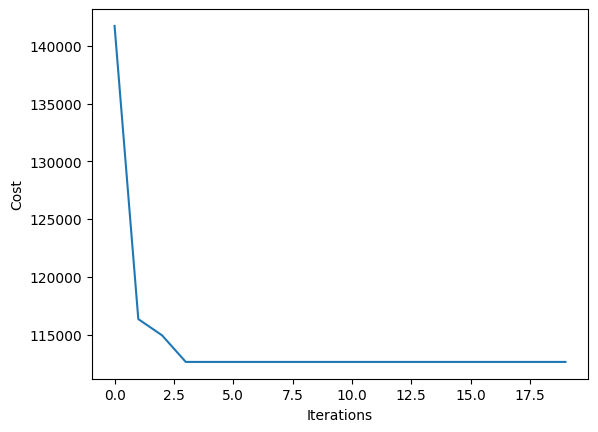

In [37]:
# Plot Global Best-Known Storage
plt.plot(J_storage_pso)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# Conclusion
<div style="text-align: justify">

After applying Particle Swarm Optimization (PSO), the model's mean absolute percentage error drops to **5.27%**, and the adjusted R-squared improves to **0.894**. These results demonstrate a significant improvement in the model's accuracy and ability to predict crop yields based on the given features. By utilizing Particle Swarm Optimization to refine the model, we were able to improve the accuracy of predicting crop yield based on key factors such as GDP for Agriculture, foreign direct investment, and temperature. 
<br>

By utilizing the multiple linear regression model to estimate future crop yields based on our independent variables, Madagascar's policymakers can significantly enhance their ability to prepare for food security challenges. With accurate predictions, officials can take a more proactive approach rather than a reactive approach when it facing worsening food insecurity. This helps to minimize the impact of potential crop shortfalls that can significantly affect Madagascar as citizens rely heavily on locally produced crops for survival.

If our predictive model forecasts a decline in crop yields due to predicted rise in temperature or reduced foreign investment in agriculture, this early warning can prompt timely interventions by officials. Policymakers can anticipate the effect these variables will have on crop yield and are able to ipltement measures to adapt to changing conditions, such as promoting climate resilient crop varieties, improving irrigation systems or diversifying agricultural production to reduce dependency on vulnerable crops, reduce the impact of climate change on crop yield and also the reliance on foreign direct investment.

Using our model, it improves decision-making processes in Madagascar by equiping officials with the necessary information to handle future food insecurity challenges and minimize the severity of food insecurity which helps to improve the lives of Madagascan.
</div>